<a href="https://colab.research.google.com/github/Ahmedosamashouman/Ahmedosamashouman/blob/main/AI_model_0_02v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement:**
Analyze and predict the viewership and success of movies and TV shows on a streaming platform based on various attributes such as catogory, title, director, cast, country, Release_date, release year, rating, duration, type, and description.

Specifically, I want to answer the following questions and perform tasks related to this dataset:

1. **Viewership and Popularity Analysis:**
   - What are the most popular types of content on the platform (Movies or TV Shows)?
   - Which countries contribute the most content?
   - Does the release year affect the popularity of content?

2. **Content Duration Analysis:**

   - Are there any trends in content duration over the years?
   
3. **Genre Analysis:**
   - Which genres are most prevalent on the platform?
   - Are there any trends in the popularity of specific genres?

4. **Country Analysis:**
   - Do viewers have a preference for content from certain countries?  

4. **Predictive Modeling:**
   - Can we build a model to predict the success (e.g., viewership, ratings) of a movie or TV show based on its attributes?


By addressing these questions and tasks, the streaming platform can gain insights into its content library, viewer preferences

# Regarding Dataset

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

***Description of each column in the dataset:***

1. **show_id:** A unique identifier for each show or movie.
   
2. **Catogory:** The type of content, either "Movie" or "TV Show."

3. **title:** The title of the movie or TV show.

4. **director:** The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

5. **cast:** The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

6. **country:** The country where the movie or TV show was produced or is associated with.

7. **Release_date:** The date when the content was added to the streaming platform, in the format "Month Day, Year."

8. **release_year:** The year the movie or TV show was originally released.

9. **rating:** The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

10. **duration:** The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

11. **Type:** The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

12. **description:** A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.

# Libraries

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Exploring The Dataset

In [5]:
netflix_data = pd.read_csv('/Netflix Dataset.csv')

In [6]:
netflix_data.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [7]:
netflix_data.shape

(7789, 11)

In [8]:
print(netflix_data.info(), "\n")
print(netflix_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None 

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [9]:
netflix_data.count()

Show_Id         7789
Category        7789
Title           7789
Director        5401
Cast            7071
Country         7282
Release_Date    7779
Rating          7782
Duration        7789
Type            7789
Description     7789
dtype: int64

In [10]:
netflix_data.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [11]:
netflix_data['Category'].unique()

array(['TV Show', 'Movie'], dtype=object)

# Analyzing the Data

**Netflix Data Null Percentage Analysis**

Perform an analysis of null (missing) values in a dataset, specifically a dataset related to Netflix content. the column names and their corresponding null percentages, making it easy to identify which columns have the most missing data

In [12]:
null_counts = netflix_data.isnull().sum()
total_rows = len(netflix_data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0       Director        30.658621
1           Cast         9.218128
2        Country         6.509180
3   Release_Date         0.128386
4         Rating         0.089870
5        Show_Id         0.000000
6       Category         0.000000
7          Title         0.000000
8       Duration         0.000000
9           Type         0.000000
10   Description         0.000000


The high percentage of missing data in the "director" and "cast" columns may impact certain analyses or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete.

**Imputation of Missing Values in Netflix Dataset**

Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.'

In [13]:
columns_to_impute = ['Director', 'Country', 'Cast', 'Rating', 'Release_Date']
for column in columns_to_impute:
    netflix_data[column].fillna("Unknown", inplace=True)

In [14]:
netflix_data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [15]:
netflix_data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [16]:
netflix_data.Description[1]

'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

In [17]:
netflix_data.Category

0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7784      Movie
7785      Movie
7786      Movie
7787    TV Show
7788      Movie
Name: Category, Length: 7789, dtype: object

**Segmentation of Netflix Dataset into TV Shows and Movies**

 the Netflix dataset is segmented into two distinct subsets: TV Shows and Movies. This segmentation is based on the 'Category' column, which indicates whether a given entry is a "TV Show" or a "Movie."

In [18]:
tv_show = netflix_data[netflix_data['Category']== 'TV Show']
movie = netflix_data[netflix_data['Category']== 'Movie']

In [19]:
display(movie.head(4), '_')
display(tv_show.head(4))

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


'_'

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...


In [20]:
movies_df = netflix_data[netflix_data['Category'] == 'Movie']
oldest_movie = movies_df[movies_df['Release_Date'] == movies_df['Release_Date'].min()]
oldest_movie

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2260,s2261,Movie,Frank and Cindy,G.J. Echternkamp,Unknown,United States,"April 1, 2016",TV-MA,70 min,"Documentaries, Music & Musicals",Frank was a rising pop star when he married Ci...
3085,s3086,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
3151,s3152,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


In [21]:
len(netflix_data['Type'].unique())

492

**Top 5 Popular Genres**

The top 5 most popular genres in the dataset, based on the number of titles available on Netflix, are as follows:

1. International Movies with 2437 titles.
2. Dramas with 2108 titles.
3. Comedies with 1472 titles.
4. International TV Shows with 1199 titles.
5. Documentaries with 786 titles.

These genres have a significant presence in the Netflix content library, with International Movies being the most prominent, followed by Dramas and Comedies. International TV Shows and Documentaries also have a substantial number of titles available on the platform, making them among the top genres on Netflix.

In [22]:
genre_counts = netflix_data['Type'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- Type
International Movies      2437
Dramas                    2108
Comedies                  1472
International TV Shows    1199
Documentaries              786
Name: count, dtype: int64


In [23]:
comedian_movies = netflix_data[netflix_data['Type'] == 'Comedies']

In [24]:
comedian_movies.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...


**Top 5 popular actors**

The top 5 most popular actors in the dataset, based on the number of appearances in Netflix content, are as follows:

1. Anupam Kher with 42 appearances.
2. Shah Rukh Khan with 35 appearances.
3. Naseeruddin Shah with 30 appearances.
4. Om Puri with 30 appearances.


These actors have a significant presence in Netflix content, with Anupam Kher being the most prolific with 42 appearances. It's clear that they are well-represented in the platform's offerings, making them prominent figures in the world of Netflix entertainment.

In [25]:
cast_counts = netflix_data['Cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular genres:-", top_5_cast)

Top 5 most popular genres:- Cast
Unknown             718
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     30
Om Puri              30
Name: count, dtype: int64


In [26]:
recent_movie_data = netflix_data[['Title', 'Category', 'Description']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)

Title                                                                                                                                                3%
Category                                                                                                                                        TV Show
Description    In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.
Name: 0, dtype: object


# visualizing

**Data Types Distribution in Netflix Dataset**

code generates a pie chart to visualize the distribution of data types within the Netflix dataset. Specifically, it provides insights into the number of columns in the dataset that belong to each data type category.

In [27]:
data_types_counts = netflix_data.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types_counts.index, values=data_types_counts.values)])
fig.update_layout(title_text="Data Types Distribution")
fig.show()

**Netflix Content Release Year Distribution**

generates a histogram using the Plotly Express library to visualize the distribution of Netflix content based on the release year. Each bar in the histogram represents the count of content items released in a particular year. The 'release_year' column from the Netflix dataset is used as the x-axis, and each bar's color represents the corresponding release year.

In [28]:
import pandas as pd
import re



# Columns to check and replace values that exclusively contain numeric characters with "Unknown"
columns_to_check = ['Director', 'Country', 'Cast', 'Release_Date', 'Title']

# Define a regex pattern to match strings that contain only digits with optional colon characters
numeric_pattern = r'^\D*\d+:\d+\D*$'  # Match strings containing digits and optional colon characters with optional non-digit characters before and after

# Iterate over each column and replace values that exclusively contain numeric characters with "Unknown"
for column in columns_to_check:
    netflix_data[column] = netflix_data[column].apply(lambda x: "Unknown" if isinstance(x, str) and re.match(numeric_pattern, x) else x)

# Display the modified DataFrame
netflix_data


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,s2,Movie,Unknown,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
2,s3,Movie,Unknown,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad","Sweden, Czech Republic, United Kingdom, Denmark, Netherlands","October 19, 2020",TV-MA,99 min,"Dramas, International Movies","When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents."
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals","A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."
7786,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & Musicals","In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture."
7787,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV","Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize."


In [29]:
fig = px.histogram(netflix_data,x="Release_Date", title="Release_Date", color="Release_Date")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

**Distribution of Netflix Content by Country with Box Plot Marginals**

creates a histogram plot using the Plotly Express library (px) to visualize the distribution of Netflix content by country. The 'country' column is used as the x-axis variable, and a histogram is constructed to show the frequency of content from different countries. Additionally, the plot includes box plot marginals, which display summary statistics (such as quartiles and outliers) for the distribution of content within each country.

In [30]:
ax = px.histogram(netflix_data,x="Country",marginal="box",title="Country")
ax.update_layout(bargap=0.2)

**Analysis of Netflix Content Categories**

performs an analysis of the content categories within the Netflix dataset. It aims to provide insights into the distribution and popularity of different content categories.

************************************************
 Type
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk S

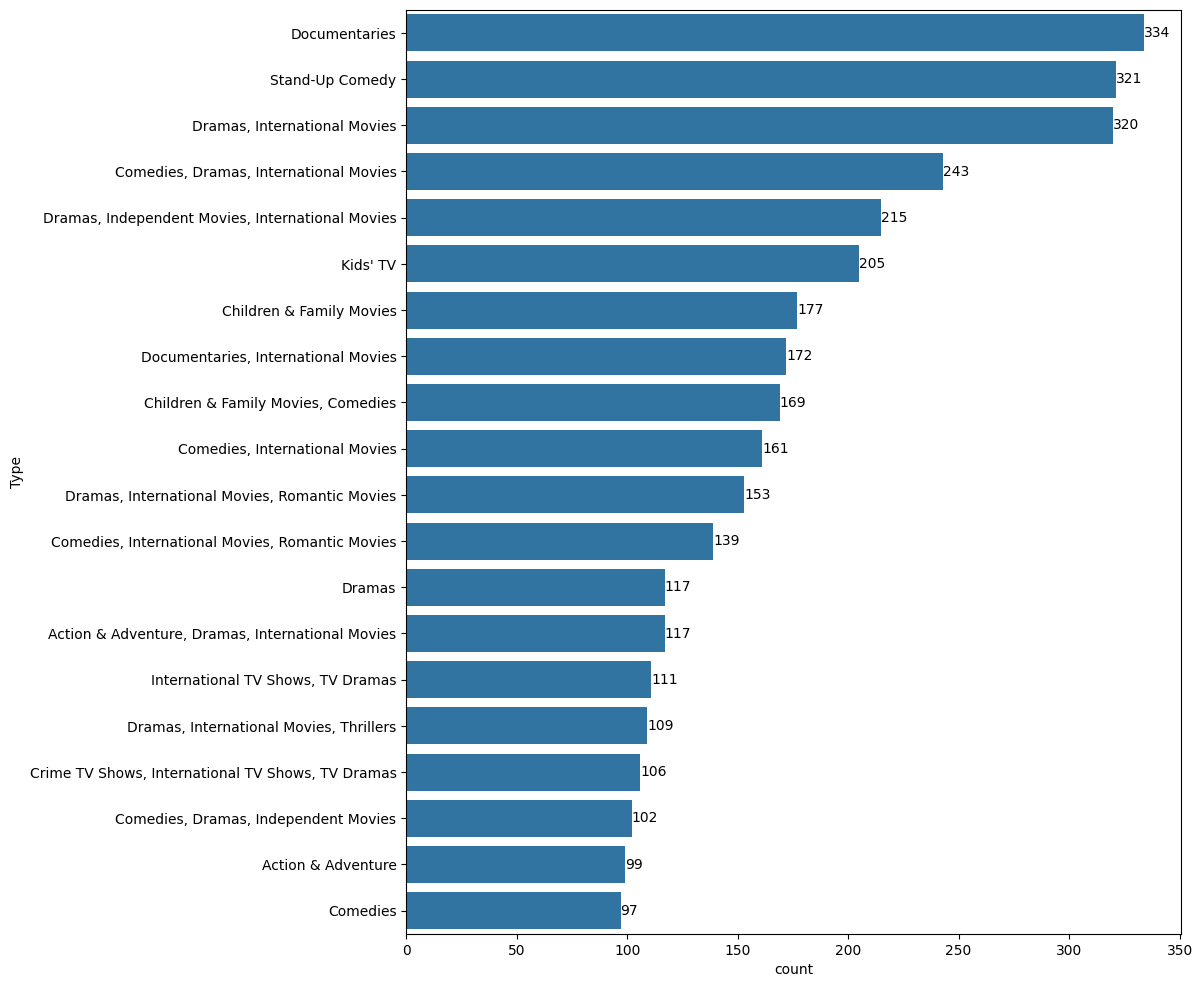

In [31]:
len(netflix_data['Type'].unique())
print('************************************************\n',netflix_data['Type'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(data=netflix_data, y="Type", order=netflix_data['Type'].value_counts().index[0:20])
ax.bar_label(ax.containers[0])
plt.show()

# Featuring

**Data Type Segmentation in the Netflix Dataset**

the Netflix dataset is segmented into three groups based on the data types of the columns:

In [32]:

# Convert "Release_Date" to datetime format, coerce invalid dates to NaN
netflix_data['Release_Date'] = pd.to_datetime(netflix_data['Release_Date'], errors='coerce')

# Extract year from "Release_Date" and create a new column "Release_Year"
netflix_data['Release_Year'] = netflix_data['Release_Date'].dt.year

# Fill NaN values in "Release_Year" with -1 (or any other placeholder value)
netflix_data['Release_Year'].fillna(-1, inplace=True)

# Convert "Release_Year" to INT64 data type
netflix_data['Release_Year'] = netflix_data['Release_Year'].astype('int64')

# Display the data types to verify the changes
netflix_data



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020
1,s2,Movie,Unknown,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",2016
2,s3,Movie,Unknown,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad","Sweden, Czech Republic, United Kingdom, Denmark, Netherlands",2020-10-19,TV-MA,99 min,"Dramas, International Movies","When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents.",2020
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals","A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past.",2019
7786,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & Musicals","In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture.",2020
7787,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV","Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize.",2020


In [45]:
data_types_counts = netflix_data.dtypes.astype(str).value_counts()
fig = go.Figure(data=[go.Pie(labels=data_types_counts.index, values=data_types_counts.values)])
fig.update_layout(title_text="Data Types Distribution")
fig.show()

In [33]:
int_col = netflix_data.select_dtypes(include=('int')).columns
str_col = netflix_data.select_dtypes(include=('object')).columns
flt_col = netflix_data.select_dtypes(include=('float')).columns

**EDA: Distribution of Integer Columns by Content Type**


an exploratory data analysis is performed to analyze the distribution of integer columns in a dataset, differentiating between "TV Shows" and "Movies" as content types. The code accomplishes the following:

Index(['Release_Year'], dtype='object')
['Release_Year']


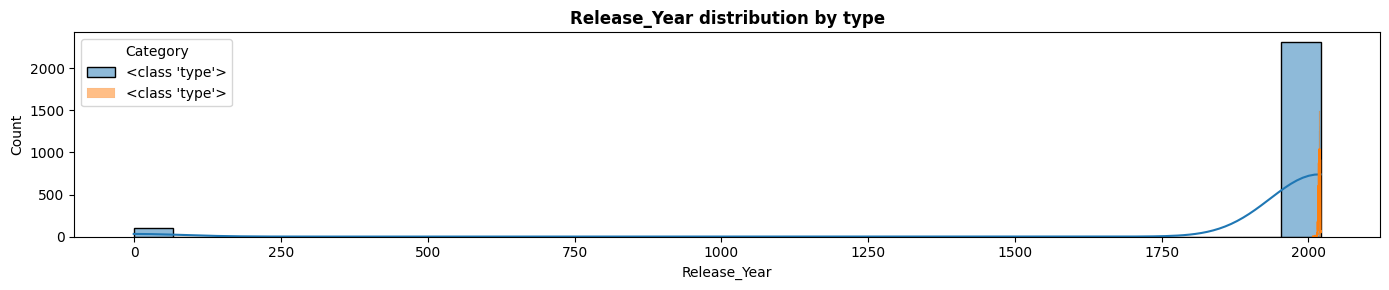

In [34]:
# Print the integer columns
print(int_col)

# Remove 'id' from int_col and create a new list
int_col_without_id = [col for col in int_col if col != 'id']

# Print the updated list
print(int_col_without_id)

# Get the unique values of the 'outcome' column
unique_outcomes = netflix_data['Category'].unique()

# Create subplots
plt.figure(figsize=(14, len(int_col_without_id) * 3))

for i, col in enumerate(int_col_without_id):
    plt.subplot(len(int_col_without_id), 1, i+1)

    for outcome in unique_outcomes:
        sns.histplot(data=netflix_data[netflix_data['Category'] == outcome], x=col, bins=30, kde=True, label=type)

    plt.title(f"{col} distribution by type", fontweight="bold")
    plt.xlabel(col)
    plt.legend(title='Category')

plt.tight_layout()
plt.show()

**Netflix Content Rating Distribution**

the Plotly library to create a histogram visualization of the distribution of content ratings in the Netflix dataset. The 'rating' column is used as the variable of interest on the x-axis, and different content ratings are color-coded for visual distinction.

In [35]:
fig = px.histogram(netflix_data,x="Rating", title="Rating", color="Rating")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

In [36]:
len(netflix_data.Duration.unique())

216

**Label Encoding Categorical Columns in Netflix Dataset**


Label encoding is a common technique used to convert categorical data into a format suitable for machine learning algorithms. It assigns a unique integer label to each unique category within a column. This encoding simplifies the representation of categorical data and allows it to be used in machine learning models that require numerical input.

In [37]:
le = LabelEncoder()
for col in str_col:
    netflix_data[col] = le.fit_transform(netflix_data[col].astype('str'))

In [38]:
netflix_data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,0,1,81,3847,3160,39,2020-08-14,8,147,398,3912,2020
1,1111,0,7331,1840,1589,308,2016-12-23,8,209,310,1390,2016
2,2222,0,7331,1289,6200,379,2018-12-20,5,190,336,7172,2018
3,3333,0,124,3446,1788,549,2017-11-16,4,194,47,3936,2017
4,4444,0,60,3176,2924,549,2020-01-01,4,30,294,138,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7784,7537,0,7757,1844,2487,429,2020-10-19,8,215,310,6876,2020
7785,7538,0,7759,2606,6474,229,2019-03-02,6,16,312,889,2019
7786,7539,0,7760,3847,4601,669,2020-09-25,8,152,269,4197,2020
7787,7540,1,7761,3847,140,12,2020-10-31,9,0,368,2823,2020


# Training and Testing

**Data Preparation for Netflix Content Classification**

The separation of feature data (X) from the target variable (Y) is a fundamental step in machine learning and classification tasks. It allows for the training of classification models that predict the content type of Netflix entries based on the available features and attributes.

In [39]:
x = netflix_data.drop(['Category'], axis='columns')
y = netflix_data[['Category']]

**Data Splitting into Training and Testing Sets**

Splitting the dataset into training and testing sets is a fundamental step in machine learning, allowing for the development and evaluation of predictive models.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Random Forest Classifier for Predictive Modeling**

In [41]:
print(x_train.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6231 entries, 1820 to 1830
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       6231 non-null   int64         
 1   Title         6231 non-null   int64         
 2   Director      6231 non-null   int64         
 3   Cast          6231 non-null   int64         
 4   Country       6231 non-null   int64         
 5   Release_Date  6150 non-null   datetime64[ns]
 6   Rating        6231 non-null   int64         
 7   Duration      6231 non-null   int64         
 8   Type          6231 non-null   int64         
 9   Description   6231 non-null   int64         
 10  Release_Year  6231 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 584.2 KB
None


In [42]:
# Convert datetime column to numeric format
x_train['Release_Date'] = pd.to_numeric(x_train['Release_Date'])

# Now, train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)


<ipython-input-42-55ccdcab8c78>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=0)

In [43]:
# Reshape y_train into a 1D array
y_train = y_train.values.ravel()

# Train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [44]:
# Assuming 'x_test' is a pandas DataFrame
# Convert datetime column to numeric format
x_test['Release_Date'] = pd.to_numeric(x_test['Release_Date'])

# Predict labels for the test set
predictions = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print accuracy
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

Accuracy of the RandomForestClassifier on the test set: 0.9910141206675225


**By actively seeking feedback and being open to suggestions, Upvote**